# Chapter 6: Linear model selection and regularization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import sklearn.linear_model as linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression


import statsmodels.formula.api as sm

### 9. In this exercise, we will predict the number of applications received using the other variables in the College data set.



In [3]:
data=pd.read_csv('../Data/College.csv')
data['Private']=data.Private.map(dict(Yes=1, No=0))
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head(1000)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


    (a) Split the data set into a training set and a test set.

In [4]:
Y=data['Apps']
X=data.loc[:, data.columns != 'Apps']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=1)

    (b) Fit a linear model using least squares on the training set, and
        report the test error obtained.


In [5]:
regr = linear_model.LinearRegression().fit(X_train,y_train) #Ordinary least squares Linear Regression.
r2=regr.score(X_test,y_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: "+str(adj_r2))

Adjusted R2: 0.9405549231802565


    (c) Fit a ridge regression model on the training set, with λ chosen
        by cross-validation. Report the test error obtained.


In [6]:
alphas = 10**np.linspace(10,-2,100)*0.5
#RidgeCV automatically fits a model with the parameter chosen by 5-folds cv.
ridge_regr=linear_model.RidgeCV(alphas=alphas,cv=5).fit(X_train, y_train)
r2=ridge_regr.score(X_test,y_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: "+str(adj_r2))

Adjusted R2: 0.9383390531848322


    (d) Fit a lasso model on the training set, with λ chosen by crossvalidation.
        Report the test error obtained, along with the number of non-zero
        coefficient estimates.


In [7]:
#LassoCV automatically fits a model with the parameter chosen by 5-folds cv.
lasso_regr=linear_model.LassoCV(alphas=alphas,cv=5).fit(X_train, y_train)
r2=lasso_regr.score(X_test,y_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: "+str(adj_r2))

Adjusted R2: 0.9377180148014893


    (e) Fit a PCR model on the training set, with M chosen by crossvalidation.
        Report the test error obtained, along with the value
        of M selected by cross-validation.


In [8]:
#Scikit-klearn does not have an implementation of PCR, but has functionality for both PCA and regression.
#We use the PCA package to do a custom implementation
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))

print(X_train_reduced.shape)
pd.DataFrame(X_train_reduced).loc[:4,:5] #First 5 components

(520, 17)


,0,1,2,3,4,5
0,-1.671218,-2.741966,0.919437,0.876959,-1.055811,-1.338789
1,-0.425905,4.587102,-0.225164,2.693938,-0.309302,-0.325614
2,4.812335,-0.392900,-0.146790,0.364861,0.206697,-0.289963
3,5.338705,1.193890,1.008683,0.425407,-0.006250,-0.385830
4,-0.358317,-1.982902,-0.980966,0.384324,0.025937,-0.864008


In [9]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 30.89,  57.07,  64.32,  70.07,  75.56,  80.62,  84.4 ,  87.68,
        90.52,  92.85,  94.96,  96.8 ,  97.83,  98.74,  99.4 ,  99.85,
       100.01])

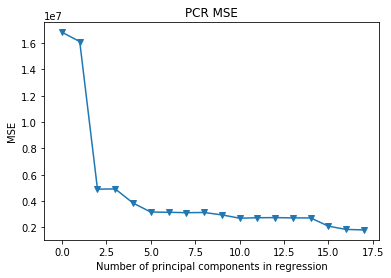

In [10]:
# 10-fold CV
n = len(X_train_reduced)
kf_10 = KFold(n_splits=10, random_state=1)

regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 17 principle components, adding one component at the time.
for i in np.arange(1, 18):
    score = -1*cross_val_score(regr, X_train_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PCR MSE')
plt.xlim(xmin=-1);

We can see that the lowest test MSE is obtained when using all the PCs for the regression. I expected that it could be better to use fewer PCs since it would be possible that this would increase bias but reduce variance in such a way that better results were obtained, but this does not seem to be the case here. It could maybe be this way since n>>p in this case, and it is not that useful to use dimensionality reduction here compared to a case with 100's of dimensions.

Now let's calculate test error for PCR with the 17 components since we have a test set. In reality we would probably use the full dataset to train the model and then use CV to test it.

In [20]:
nPC=17

X_reduced_test = pca.transform(scale(X_test))[:,:nPC]

# Train regression model on training data 
pcr = linear_model.LinearRegression().fit(X_train_reduced[:,:nPC], y_train)

# Prediction score with test data
r2=pcr.score(X_reduced_test,y_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_reduced_test.shape[1]-1)
print("Adjusted R2: "+str(adj_r2))

Adjusted R2: 0.8824621324231251


It is worth noting that (at least) for this particular training/test set, the PCR performs worse than regular Linear regression according to the adjuster r2 (0.88 vs 0.94). I would have guessed before testing that there would probably be some colinearity in the data which would make the PCR perform better. Let's check the correlation matrix to further investigate.

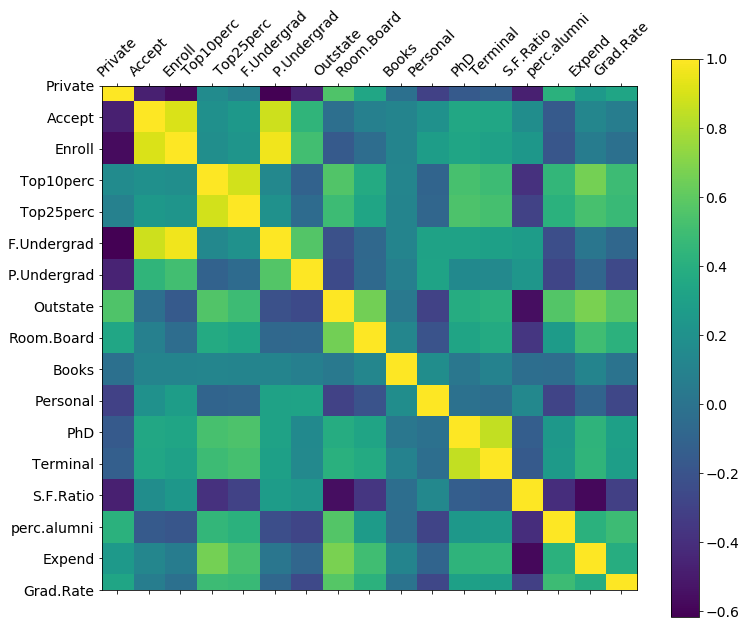

In [16]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 10))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=45)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('', fontsize=16);


We can see that there is some correlation in the data. For example 'Top10Percent' and 'Top25Percent' has a quite high correlation of around 0.8, and also 'Accept' and 'Enroll' have a large positive correlation.

To me I therefore find it a little surprising that regular linear regression performs better than PCR without even performing any variable selection. I hope I performed the PCR correctly! However, there are many observations in the dataset which would make linear regression work ok since n>>p. Perhaps testing with another train/test split or CV would yield different results, but I don't have any more time to do it now. I am unsure how to further conclude what these results indicates.

    (f) Fit a PLS model on the training set, with M chosen by crossvalidation.
        Report the test error obtained, along with the value
        of M selected by cross-validation.


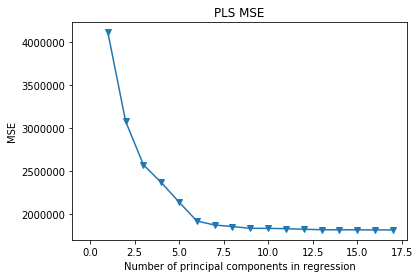

In [276]:
n = len(X_train)

# 10-fold CV
kf_10 = KFold(n_splits=10, random_state=1)

mse = []

for i in np.arange(1, 18):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 18), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PLS MSE')
plt.xlim(xmin=-1);


The result indicates that 16 components gives the lowest mse. Now lets calculate ajd. R2 for the test set:

In [374]:
pls = PLSRegression(n_components=16).fit(scale(X_train), y_train)
#For some reason the pls.score does not return the r2. We do it manually instead. 
# 1 - RSS / ESS
y_predicted=pls.predict(scale(X_test))
y_true=y_test.to_numpy().reshape(len(y_true),1)
RSS=sum(np.subtract(y_true,y_predicted)**2)[0]
ESS=sum( (y_predicted-y_true.mean())**2 )
r2 = (1-RSS/ESS)[0]
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: "+str(adj_r2))

Adjusted R2: 0.9126258399830719


    (g) Comment on the results obtained. How accurately can we predict
        the number of college applications received? Is there much
        difference among the test errors resulting from these five approaches?

It seems as the Linear regression method is performing the best, according to the adjusted R-squared. Of course, in this exercise we are not applying CV to test the different methods since we are only splitting into a test/training set once. A 0.94 ajusted R-squared is pretty good, and it seems that we can predict the number of applications pretty good. The reason that the linear regression performs the best is probably because the underlying distribution is close to linear. However, the other methods performs pretty well also. I am a bit skeptical as to how linear regression without any variable selection could perform as good as it does, and further investigation is warranted.